<a href="https://colab.research.google.com/github/i-SanMartin/FastAI/blob/main/04_MNIST_Basics/Basic_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
!pip install -Uqq fastbook fastai==2.2.5
import fastbook
fastbook.setup_book()

In [145]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f1787abc810>,
 torch.Size([12396, 784]),
 torch.Size([12396, 1]))

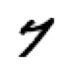

In [146]:
#Download training data
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path
path.ls()
(path/'train').ls()
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_y = tensor([0]*len(stacked_threes)+ [1]*(len(stacked_sevens))).unsqueeze(1)
show_image(stacked_sevens[1]*255), train_x.shape, train_y.shape

In [147]:
#Download validation data
threes = (path/'valid'/'3').ls().sorted()
sevens = (path/'valid'/'7').ls().sorted()
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
valid_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
valid_y = tensor([0]*len(stacked_threes)+ [1]*(len(stacked_sevens))).unsqueeze(1)

In [148]:
#Create dataset with training data
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y

(torch.Size([784]), tensor([0]))

In [149]:
#Create DataLoader of size 256 with dataset
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [150]:
#Create datase anda dataloader with validation data
valid_dset = list(zip(valid_x,valid_y))
valid_dl = DataLoader(dset, batch_size=256)

In [151]:
dls = DataLoaders(dl,valid_dl)

In [152]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [153]:
#Loss function
def mnist_loss(predictions, targets):
    predictions = torch.sigmoid(predictions)
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [154]:
#Function to see the accuracy of a batch
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [155]:
learn = Learner(dls, simple_net, opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [156]:
learn.fit(40,0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.327260,0.384944,0.528719,00:00
1,0.150951,0.238871,0.791868,00:00
2,0.083483,0.123277,0.905211,00:00
3,0.054546,0.083519,0.937319,00:00
4,0.041107,0.065066,0.951436,00:00
5,0.034261,0.054453,0.958777,00:00
6,0.030354,0.047522,0.963698,00:00
7,0.027830,0.042618,0.966925,00:00
8,0.026021,0.038936,0.970071,00:00
9,0.024624,0.036058,0.972007,00:00


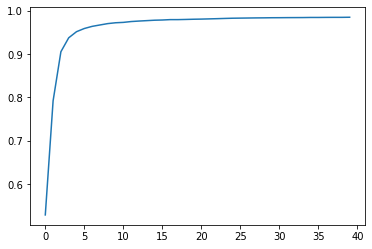

In [157]:
plt.plot(L(learn.recorder.values).itemgot(2));